## Visualize the progress of your learning rate in PyTorch before training

In [1]:
import torchvision.utils as vutils
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class ReduceLROnPlateauMy(torch.optim.lr_scheduler.ReduceLROnPlateau):
    def __init__(self, optimizer, mode='min', factor=0.1, patience=10,
                 verbose=False, threshold=1e-4, threshold_mode='rel',
                 cooldown=0, min_lr=0, eps=1e-8):
        super().__init__(optimizer, mode='min', factor=0.1, patience=10,
                         verbose=False, threshold=1e-4, threshold_mode='rel',
                         cooldown=0, min_lr=0, eps=1e-8)

    def get_lr(self):
        for param_group in self.optimizer.param_groups:
            curr_lr = param_group['lr']
        return [curr_lr]


def init_lr_scheduler(optimizer,
                      lr_scheduler='multi_step',  # learning rate scheduler
                      stepsize=[15, 30, 50, 80],  # step size to decay learning rate
                      gamma=0.5,  # learning rate decay
                      patience=5  # after how many epochs of plateau to decrease the learning rate
                      ):
    if lr_scheduler == 'single_step':
        return torch.optim.lr_scheduler.StepLR(optimizer, step_size=stepsize[0], gamma=gamma)
    elif lr_scheduler == 'multi_step':
        return torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=stepsize, gamma=gamma)
    elif lr_scheduler == 'on_plateau':
        return ReduceLROnPlateauMy(optimizer, mode='min', factor=gamma, patience=patience, verbose=True)
    elif lr_scheduler == 'exponential':
        return torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma, last_epoch=-1)
    elif lr_scheduler == 'cossine_annealing':
        return torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=patience, eta_min=0, last_epoch=-1)
    else:
        raise ValueError('Unsupported lr_scheduler: {}'.format(lr_scheduler))


0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.000475
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.00045125
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.0004286875
0.000428

0.00024383748955776477
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.0002316456150798765
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.00022006333432588268
0.0002200633343258

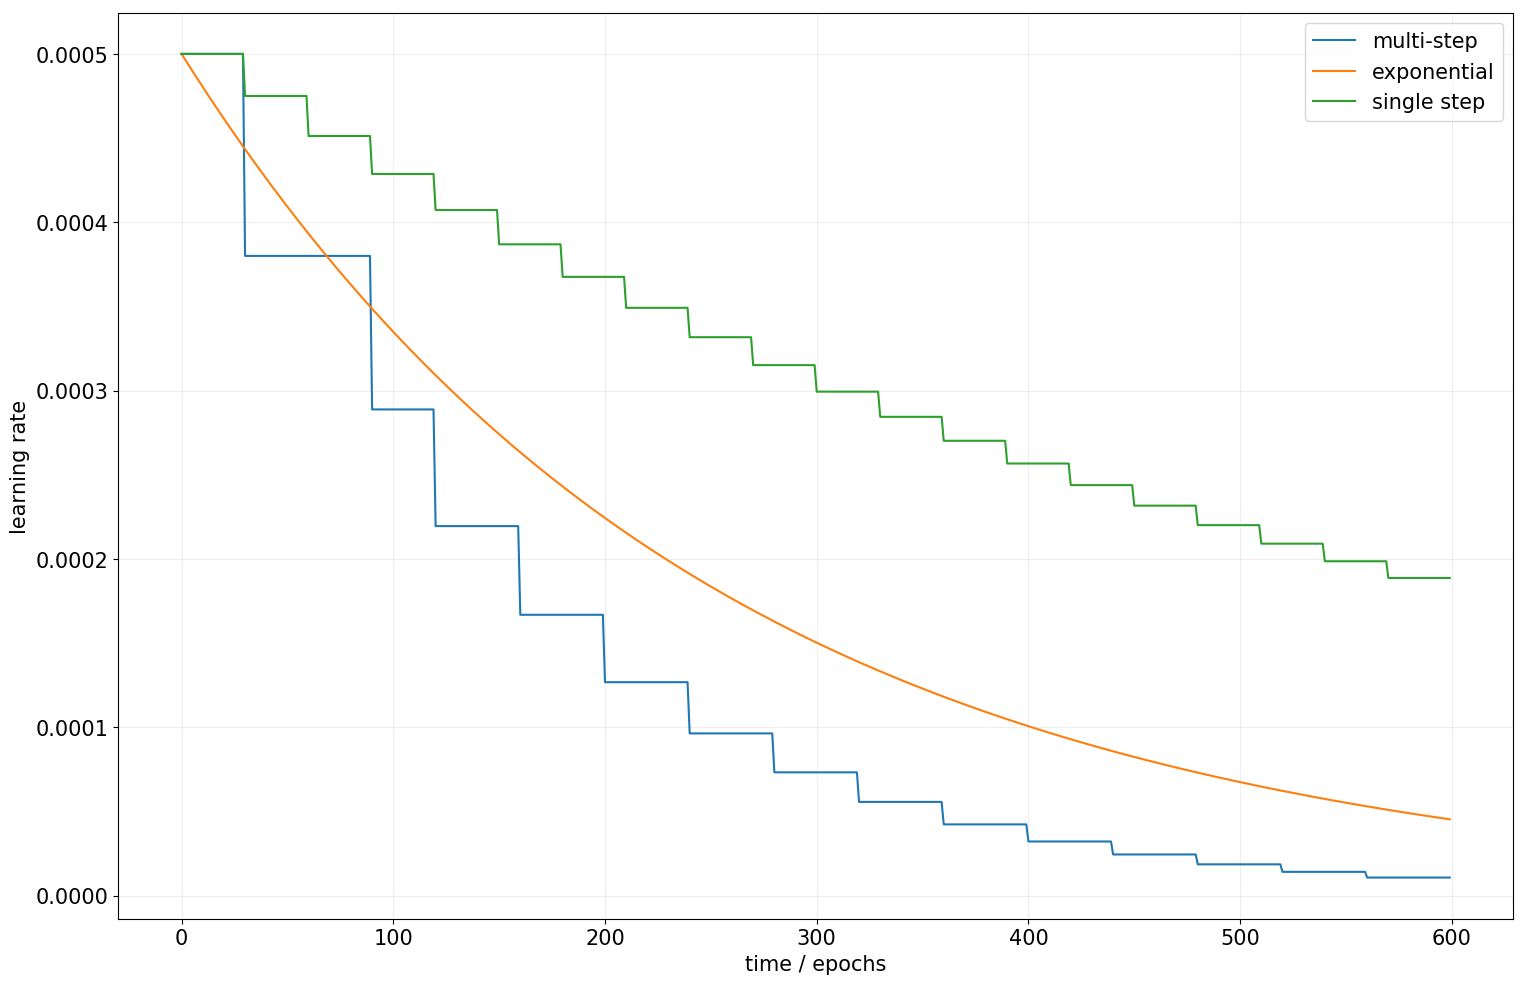

In [7]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 5e-4
milestones=[30,90, 120, 160, 200, 240,280,320, 360,400, 440, 480, 520, 560,600, 640, 680 ]

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#scheduler=torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.8)


scheduler_mul = init_lr_scheduler(optimizer,
                   lr_scheduler='multi_step',  # learning rate scheduler
                      stepsize=milestones,  # step size to decay learning rate
                      gamma=0.76,  # learning rate decay
                      patience=5  # after how many epochs of plateau to decrease the learning rate
                      )

scheduler_sgl = init_lr_scheduler(optimizer,
                   lr_scheduler='single_step',  # learning rate scheduler
                      stepsize=milestones,  # step size to decay learning rate
                      gamma=0.95,  # learning rate decay
                      )

scheduler_exp = init_lr_scheduler(optimizer,
                   lr_scheduler='exponential',  # learning rate scheduler
                      gamma=0.996,  # learning rate decay
                      )
scheduler_cos = init_lr_scheduler(optimizer,
                   lr_scheduler='cossine_annealing',  # learning rate scheduler
                      patience=25 #fter how many epochs of plateau to decrease the learning rate
                      )

lr_exp_list = []
lr_mul_list = []
lr_sgl_list = []
lr_cos_list = []

epochs = 600

for t in range(epochs):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
   # print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). 
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
   
    
    #update the parameters of the scheduler. you can do this every epoch 
    scheduler_mul.step()
    scheduler_exp.step()
    scheduler_sgl.step()
    #scheduler_cos.step()
    
    for g in optimizer.param_groups:
        print(g['lr'])
    
    lr_mul_list.append(scheduler_mul.get_lr()[0])
    lr_exp_list.append(scheduler_exp.get_lr()[0])
    lr_sgl_list.append(scheduler_sgl.get_lr()[0])
    lr_cos_list.append(scheduler_cos.get_lr()[0])


fig=plt.figure(figsize=(18, 12), dpi= 100, facecolor='w', edgecolor='k') 
plt.rcParams.update({'font.size': 15})
plt.plot([x for x in range(0,epochs)], lr_mul_list)
plt.plot([x for x in range(0,epochs)], lr_exp_list)   
plt.plot([x for x in range(0,epochs)], lr_sgl_list)   
#plt.plot([x for x in range(0,epochs)], lr_cos_list)   

plt.xlabel('time / epochs')
plt.ylabel('learning rate')
plt.grid(True, alpha=0.2)
plt.legend(('multi-step', 'exponential', 'single step','cossine annealing'),
           loc='upper right')
print('minimum learning rate for exponential is {}'.format(min(lr_exp_list)))
print('minimum learning rate for multistep is {}'.format(min(lr_mul_list)))